In [80]:
import pandas as pd


In [81]:
dt1 = pd.read_csv('Attrition Rate Analysis.csv')

In [82]:
dt1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [83]:
dt1 = dt1.dropna()

In [84]:
dt1 = dt1.drop_duplicates()

In [85]:
dt1 = dt1.drop(['EmployeeID', 'Over18'], axis=1)

In [86]:
dt1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x230b72a4520>,
 'caps': [<matplotlib.lines.Line2D at 0x230b72a4ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230b72a4250>],
 'medians': [<matplotlib.lines.Line2D at 0x230b72a5060>],
 'fliers': [<matplotlib.lines.Line2D at 0x230b72a5330>],
 'means': []}

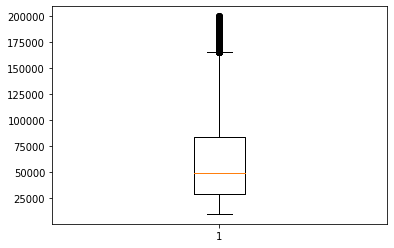

In [87]:
import matplotlib.pyplot as plt
plt.boxplot(dt1.MonthlyIncome)

{'whiskers': [<matplotlib.lines.Line2D at 0x230b72ce560>,
 'caps': [<matplotlib.lines.Line2D at 0x230b72ceb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x230b72ce3b0>],
 'medians': [<matplotlib.lines.Line2D at 0x230b72cf0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230b72cf370>],
 'means': []}

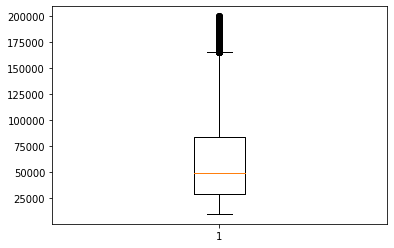

In [88]:
#plot is positively skewed
plt.boxplot(dt1.MonthlyIncome)

{'whiskers': [<matplotlib.lines.Line2D at 0x230b7334760>,
 'caps': [<matplotlib.lines.Line2D at 0x230b7334d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x230b7334490>],
 'medians': [<matplotlib.lines.Line2D at 0x230b73352a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230b7335570>],
 'means': []}

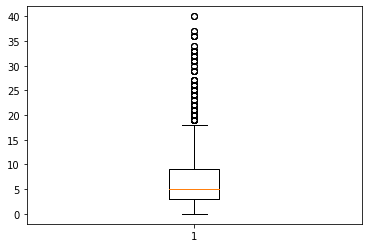

In [89]:
plt.boxplot(dt1.YearsAtCompany)

In [90]:
#import logistic regression
import statsmodels.api as sm
Y = dt1.Attrition
X = dt1[['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [91]:
from sklearn import preprocessing

In [92]:
label_encoder=preprocessing.LabelEncoder()

In [93]:
dt1['Attrition'] = label_encoder.fit_transform(dt1['Attrition'])

In [94]:
dt1['BusinessTravel'] = label_encoder.fit_transform(dt1['BusinessTravel'])

In [95]:
dt1['Department'] = label_encoder.fit_transform(dt1['Department'])

In [96]:
dt1['EducationField'] = label_encoder.fit_transform(dt1['EducationField'])

In [97]:
dt1['Gender'] = label_encoder.fit_transform(dt1['BusinessTravel'])

In [98]:
dt1['JobRole'] = label_encoder.fit_transform(dt1['JobRole'])

In [99]:
dt1['MaritalStatus'] = label_encoder.fit_transform(dt1['MaritalStatus'])

In [100]:
import statsmodels.api as sm
Y = dt1.Attrition


In [101]:
X = dt1[['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [102]:
X1 = sm.add_constant(X)
# Logistic=sm.Logit(Y,X1)
# result = Logistic.fit()

In [103]:
Logistic=sm.Logit(Y,X1)

In [104]:
result = Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.393020
         Iterations 7


LinAlgError: Singular matrix

In [105]:
result.summary()

AttributeError: 'function' object has no attribute 'summary'